In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup/WorldCupPlayers.csv
/kaggle/input/fifa-world-cup/WorldCupMatches.csv
/kaggle/input/fifa-world-cup/WorldCups.csv


In [2]:
data = pd.read_csv("https://qwerty159.com/data.csv")


In [3]:
data.shape

(27591, 12)

In [4]:
players = pd.read_csv("/kaggle/input/fifa-world-cup/WorldCupPlayers.csv")
matches = pd.read_csv("/kaggle/input/fifa-world-cup/WorldCupMatches.csv")
world_cup = pd.read_csv("/kaggle/input/fifa-world-cup/WorldCups.csv")

In [5]:
players.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN


In [6]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [7]:
world_cup.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


# # Players

In [8]:
players.shape

(37784, 9)

In [9]:
players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [10]:
players['Line-up'].value_counts()

N    19040
S    18744
Name: Line-up, dtype: int64

In [11]:

coaches=players.groupby(["Coach Name"]).size().reset_index().rename(columns={0:"num"})

In [12]:
print("the top 10 coaches palyes matches")
coaches.nlargest(10, 'num')

the top 10 coaches palyes matches


,Coach Name,num
278,SCOLARI Luiz Felipe (BRA),575
277,SCHOEN Helmut (FRG),550
222,PARREIRA Carlos Alberto (BRA),514
189,MILUTINOVIC Bora (YUG),443
333,ZAGALLO Mario (BRA),440
159,LOEW Joachim (GER),414
110,HIDDINK Guus (NED),407
18,BEARZOT Enzo (ITA),396
104,HERBERGER Sepp (FRG),396
297,TABAREZ Oscar (URU),364


In [13]:
#players.rename(columns={'Team initials': 'newName1', 'oldName2': 'newName2'}, inplace=True)


In [14]:
playersp = players\
                            .groupby(["Player Name","Team Initials"])\
                            .size()\
                            .reset_index()\
                            .rename(columns={0:"num"})

In [15]:
print("the top 10 players palyes matches")
playersp.nlargest(10, 'num')

the top 10 players palyes matches


,Player Name,Team Initials,num
4130,KLOSE,GER,32
5274,M�LLER,GER,28
5540,OSCAR,BRA,28
1123,CAFU,BRA,26
3457,JULIO CESAR,BRA,26
6122,RONALDO,BRA,26
1556,DIDA,BRA,25
4324,LAHM,GER,25
4350,LEAO,BRA,25
4796,MERTESACKER,GER,25


In [16]:
players.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [17]:
players['Player_Name']=players['Player Name']
players.drop('Player Name', axis=1, inplace=True, errors="ignore")

In [18]:
# players.query("Player Name" == "RONALDO")

display(players.query('Player_Name =="RONALDO"' ))


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Position,Event,Player_Name
20604,337,3057,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
21044,337,3067,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
21484,337,3080,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
22012,338,3090,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
22189,796,3098,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
22365,3461,3099,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
22452,3459,3104,BRA,PARREIRA Carlos Alberto (BRA),N,20,NaN,NaN,RONALDO
22474,1014,4000,BRA,ZAGALLO Mario (BRA),S,9,NaN,NaN,RONALDO
23220,1014,8742,BRA,ZAGALLO Mario (BRA),S,9,NaN,G9',RONALDO
24008,1014,8759,BRA,ZAGALLO Mario (BRA),S,9,NaN,NaN,RONALDO


In [19]:
teams = players\
                            .groupby(["Team Initials"])\
                            .size()\
                            .reset_index()\
                            .rename(columns={0:"num"})

 # world_cup

In [20]:
world_cup.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [21]:
world_cup.tail(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


from 1930 until 2014

In [22]:
world_cup.shape

(20, 10)

In [23]:
world_cup.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [24]:
world_cup.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

In [25]:
print("the top 10 winners ")
world_cup.groupby("Winner").size().reset_index().rename(columns={0:"num"}).nlargest(10, 'num')

the top 10 winners 


,Winner,num
1,Brazil,5
6,Italy,4
5,Germany FR,3
0,Argentina,2
8,Uruguay,2
2,England,1
3,France,1
4,Germany,1
7,Spain,1


In [26]:
print("the top 2en  ")

world_cup.groupby("Runners-Up").size().reset_index().rename(columns={0:"num"}).nlargest(10, 'num')

the top 2en  


,Runners-Up,num
0,Argentina,3
5,Germany FR,3
8,Netherlands,3
1,Brazil,2
2,Czechoslovakia,2
6,Hungary,2
7,Italy,2
3,France,1
4,Germany,1
9,Sweden,1


In [27]:
print("the top 3rd  ")

world_cup.groupby("Third").size().reset_index().rename(columns={0:"num"}).nlargest(10, 'num')

the top 3rd  


,Third,num
5,Germany,3
1,Brazil,2
4,France,2
9,Poland,2
11,Sweden,2
0,Austria,1
2,Chile,1
3,Croatia,1
6,Germany FR,1
7,Italy,1


In [28]:
print("the top 4th  ")

world_cup.groupby("Fourth").size().reset_index().rename(columns={0:"num"}).nlargest(10, 'num')

the top 4th  


,Fourth,num
14,Uruguay,3
2,Brazil,2
15,Yugoslavia,2
0,Austria,1
1,Belgium,1
3,Bulgaria,1
4,England,1
5,France,1
6,Germany FR,1
7,Italy,1


In [29]:
print("the country who organized the world cup")

world_cup.groupby("Country").size().reset_index().rename(columns={0:"num"}).nlargest(15, 'num')

the country who organized the world cup


,Country,num
1,Brazil,2
4,France,2
5,Germany,2
6,Italy,2
8,Mexico,2
0,Argentina,1
2,Chile,1
3,England,1
7,Korea/Japan,1
9,South Africa,1


# matches

In [30]:
matches.shape

(4572, 20)

In [31]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [32]:
matches=matches.dropna()


In [33]:
matches.shape

(850, 20)

In [34]:
matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [35]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [36]:
world_cup.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [37]:
players.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Position,Event,Player_Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,GK,NaN,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,GK,NaN,Oscar BONFIGLIO


# matches join worldcup

In [38]:
matches.Year=matches.Year.astype(int)

In [39]:
matches.shape

(850, 20)

In [40]:
world_cup.shape

(20, 10)

In [41]:
matches_world_cup = matches.merge(world_cup, on=["Year"])

In [42]:
matches_world_cup.shape

(850, 29)

In [43]:
matches_world_cup

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,CRC,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
846,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,GER,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
847,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,ARG,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
848,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,...,NED,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [44]:
matches_world_cup['Winner']=matches_world_cup['Winner'].astype('string')
matches_world_cup['Home Team Name']=matches_world_cup['Home Team Name'].astype('string')
matches_world_cup['Away Team Name']=matches_world_cup['Away Team Name'].astype('string')

In [45]:
matches_world_cup.loc[matches_world_cup['Winner'] == matches_world_cup['Home Team Name']]

matches_world_cup_winners=matches_world_cup.loc[(matches_world_cup['Winner'] == matches_world_cup['Home Team Name']) | (matches_world_cup['Winner'] == matches_world_cup['Away Team Name'])]


In [46]:
display(matches_world_cup_winners.query('Winner=="Italy"'))



,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
24,1934,27 May 1934 - 16:30,Preliminary round,Nazionale PNF,Rome,Italy,7.0,1.0,USA,,...,USA,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
28,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,1.0,Spain,,...,ESP,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
30,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,0.0,Spain,,...,ESP,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
31,1934,03 Jun 1934 - 16:30,Semi-finals,San Siro,Milan,Italy,1.0,0.0,Austria,,...,AUT,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
34,1934,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,Italy win after extra time,...,TCH,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
39,1938,05 Jun 1938 - 17:00,First round,Stade V�lodrome,Marseilles,Italy,2.0,1.0,Norway,Italy win after extra time,...,NOR,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
47,1938,12 Jun 1938 - 17:00,Quarter-finals,Stade Olympique,Colombes,Italy,3.0,1.0,France,,...,FRA,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
50,1938,16 Jun 1938 - 18:00,Semi-finals,Stade V�lodrome,Marseilles,Italy,2.0,1.0,Brazil,,...,BRA,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
52,1938,19 Jun 1938 - 17:00,Final,Stade Olympique,Colombes,Italy,4.0,2.0,Hungary,,...,HUN,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
309,1982,14 Jun 1982 - 17:15,Group 1,Estadio Municipal de Bala�dos,Vigo,Italy,0.0,0.0,Poland,,...,POL,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723


In [47]:
aa=matches_world_cup.loc[(matches_world_cup['Winner'] == matches_world_cup['Home Team Name'])].groupby(["Winner","Year"]).agg({"Home Team Goals" : np.sum})\
                        .reset_index()
                               


In [48]:
aa

,Winner,Year,Home Team Goals
0,Argentina,1978,15.0
1,Argentina,1986,13.0
2,Brazil,1958,16.0
3,Brazil,1962,14.0
4,Brazil,1970,19.0
5,Brazil,1994,7.0
6,Brazil,2002,9.0
7,England,1966,11.0
8,France,1998,12.0
9,Germany,2014,8.0


In [49]:
aa=aa.merge(matches_world_cup.loc[(matches_world_cup['Winner'] == matches_world_cup['Away Team Name'])].groupby(["Winner","Year"]).agg({"Away Team Goals" : np.sum})\
                        .reset_index(), on=["Winner","Year"],how='left')

In [50]:
aa.fillna(0, inplace=True)

In [51]:
aa["total_scored"]=aa["Home Team Goals"]+aa["Away Team Goals"]

In [52]:
aa

,Winner,Year,Home Team Goals,Away Team Goals,total_scored
0,Argentina,1978,15.0,0.0,15.0
1,Argentina,1986,13.0,1.0,14.0
2,Brazil,1958,16.0,0.0,16.0
3,Brazil,1962,14.0,0.0,14.0
4,Brazil,1970,19.0,0.0,19.0
5,Brazil,1994,7.0,4.0,11.0
6,Brazil,2002,9.0,9.0,18.0
7,England,1966,11.0,0.0,11.0
8,France,1998,12.0,3.0,15.0
9,Germany,2014,8.0,17.0,25.0


In [53]:
bb=matches_world_cup.loc[(matches_world_cup['Winner'] == matches_world_cup['Home Team Name'])].groupby(["Winner","Year"]).agg({"Away Team Goals" : np.sum})\
                        .reset_index()

In [54]:
bb=bb.merge(matches_world_cup.loc[(matches_world_cup['Winner'] == matches_world_cup['Away Team Name'])].groupby(["Winner","Year"]).agg({"Home Team Goals" : np.sum})\
                        .reset_index(), on=["Winner","Year"],how='left')

In [55]:
bb.fillna(0, inplace=True)

In [56]:
bb["goals_received"]=bb["Away Team Goals"]+bb["Home Team Goals"]

In [57]:
bb

,Winner,Year,Away Team Goals,Home Team Goals,goals_received
0,Argentina,1978,3.0,1.0,4.0
1,Argentina,1986,4.0,1.0,5.0
2,Brazil,1958,4.0,0.0,4.0
3,Brazil,1962,5.0,0.0,5.0
4,Brazil,1970,7.0,0.0,7.0
5,Brazil,1994,1.0,2.0,3.0
6,Brazil,2002,1.0,3.0,4.0
7,England,1966,3.0,0.0,3.0
8,France,1998,2.0,0.0,2.0
9,Germany,2014,2.0,2.0,4.0


In [58]:
goals_time_winners=matches_world_cup_winners.groupby(["Winner","Year"]).agg({"Home Team Goals" : np.sum,
                                                      "Away Team Goals" : np.sum,
                                                      "Half-time Home Goals" : np.sum,
                                                      "Half-time Away Goals" : np.sum,
                                                                 })\
                                    .reset_index()

In [59]:
goals_time_winners.sort_values(by=['Year'], ascending=False)

,Winner,Year,Home Team Goals,Away Team Goals,Half-time Home Goals,Half-time Away Goals
9,Germany,2014,10.0,19.0,3.0,12.0
17,Spain,2010,4.0,6.0,1.0,2.0
16,Italy,2006,8.0,6.0,3.0,2.0
6,Brazil,2002,12.0,10.0,5.0,5.0
8,France,1998,12.0,5.0,3.0,3.0
5,Brazil,1994,9.0,5.0,2.0,1.0
12,Germany FR,1990,15.0,5.0,5.0,0.0
1,Argentina,1986,14.0,5.0,6.0,1.0
15,Italy,1982,10.0,8.0,3.0,2.0
0,Argentina,1978,16.0,3.0,5.0,1.0


In [60]:
goals_time=matches_world_cup.groupby(["Winner","Year","Home Team Name"]).agg({"Home Team Goals" : np.sum,
                                                      "Away Team Goals" : np.sum,
                                                      "Half-time Home Goals" : np.sum,
                                                      "Half-time Away Goals" : np.sum,
                                                                 })\
                                    .reset_index()

In [61]:
goals_time=goals_time.sort_values(by=['Year'])

In [62]:
goals_time['goals_diff']=abs(goals_time['Home Team Goals']-goals_time['Away Team Goals'])
goals_time['goals_scored_1st_half']=goals_time['Half-time Home Goals']
goals_time['goals_scored_2nd_half']=goals_time['Home Team Goals']-goals_time['Half-time Home Goals']
goals_time['goals_received_1st_half']=goals_time['Half-time Away Goals']
goals_time['goals_received_2nd_half']=goals_time['Away Team Goals']-goals_time['Half-time Away Goals']

In [63]:
goals_time.drop(['Half-time Home Goals','Half-time Away Goals'], axis=1, inplace=True, errors="ignore")

In [64]:
goals_time

,Winner,Year,Home Team Name,Home Team Goals,Away Team Goals,goals_diff,goals_scored_1st_half,goals_scored_2nd_half,goals_received_1st_half,goals_received_2nd_half
352,Uruguay,1930,Romania,3.0,1.0,2.0,1.0,2.0,0.0,1.0
347,Uruguay,1930,Argentina,16.0,5.0,11.0,6.0,10.0,2.0,3.0
348,Uruguay,1930,Brazil,4.0,0.0,4.0,1.0,3.0,0.0,0.0
349,Uruguay,1930,Chile,4.0,0.0,4.0,1.0,3.0,0.0,0.0
350,Uruguay,1930,France,4.0,1.0,3.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
171,Germany,2014,Belgium,7.0,3.0,4.0,0.0,7.0,1.0,2.0
170,Germany,2014,Australia,2.0,6.0,4.0,1.0,1.0,2.0,4.0
169,Germany,2014,Argentina,7.0,1.0,6.0,3.0,4.0,0.0,1.0
183,Germany,2014,Ghana,1.0,2.0,1.0,0.0,1.0,1.0,1.0


In [65]:
goals_time['Winner']=goals_time['Winner'].astype('string')
goals_time['Home Team Name']=goals_time['Home Team Name'].astype('string')



In [66]:
goals_time.dtypes

Winner                      string
Year                         int64
Home Team Name              string
Home Team Goals            float64
Away Team Goals            float64
goals_diff                 float64
goals_scored_1st_half      float64
goals_scored_2nd_half      float64
goals_received_1st_half    float64
goals_received_2nd_half    float64
dtype: object

In [67]:
print('Goals scored in first half vs second half by the winners')
px.bar(goals_time.sort_values(by=['Home Team Goals'], ascending=False),x='Year',y=['goals_scored_1st_half','goals_scored_2nd_half'], barmode='group',hover_data=['Winner'] )


Goals scored in first half vs second half by the winners


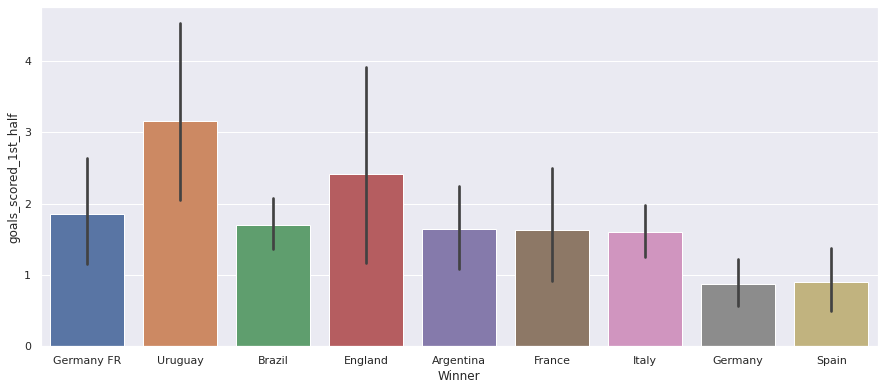

In [68]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6.24)})
ax = sns.barplot(x="Winner", y="goals_scored_1st_half", data=goals_time.sort_values(by=['Home Team Goals'], ascending=False))

In [69]:
# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.bar(x=goals_time["Winner"], y=goals_time["goals_scored_1st_half"])
# ax2.bar(x=goals_time["Winner"], y=goals["goals_scored_2nd_half"])

# ax1.set_xlabel('Winner')
# ax1.set_ylabel('goals_scored_1st_half', color='g')
# ax2.set_ylabel('goals_scored_2nd_half', color='b')

# plt.show()

In [70]:
print('Goals received in first half vs second half by the winners')
px.bar(goals_time.sort_values(by=['Home Team Goals'], ascending=False),x='Year',y=['goals_received_1st_half','goals_received_2nd_half'], barmode='group',hover_data=['Winner'] )


Goals received in first half vs second half by the winners
